# Assignment 11 - Neural Networks image recognition
Use both MLNN and the ConvNet to solve the following problem.

1. Add random noise (i.e. `np.random.normal`) to the images in training and testing. Make sure each image gets a different noise feature added to it. Inspect by printing out an image. 
2. Compare the loss/accuracy (train, val) after N epochs for both MLNN and ConvNet with and without noise. 
3. Vary the amount of noise (multiply `np.random.normal` by a factor) and keep track of the accuracy and loss (for training and validation) and plot these results.

# Neural Networks - Image Recognition 

In [9]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend
    
import numpy as np

import matplotlib.pyplot as  plt
%matplotlib inline

from skimage.util import random_noise

In [21]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

batch_size = 128
num_classes = 10
epochs = 10

# add 5% noise
x_train_noise = x_train + np.random.normal(0, 255*.05, x_train.shape)
x_test_noise = x_test + np.random.normal(0, 255*.05, x_test.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [22]:
x_train.shape

(60000, 28, 28)

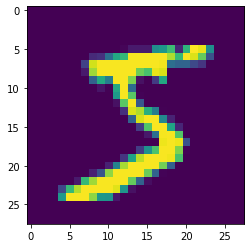

In [3]:
# print images

plt.imshow(x_train[0])

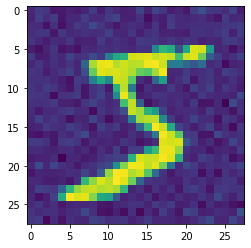

In [4]:
plt.imshow(x_train_noise[0])

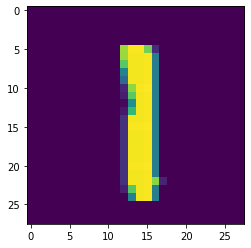

In [5]:
plt.imshow(x_test[2822])

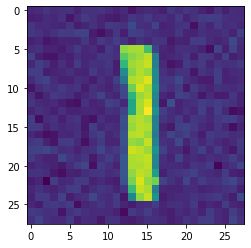

In [6]:
plt.imshow(x_test_noise[2822])

In [7]:
x_train.shape[0]

60000

## MLNN

In [8]:
# create function to reshape data for MLNN

def mlnn_data_reshape(dataset):
    reshaped = dataset.reshape(dataset.shape[0], 784)
    reshaped = reshaped.astype('float32')
    reshaped = reshaped / 255
    return reshaped

In [9]:
x_train_mlnn = mlnn_data_reshape(x_train)
x_test_mlnn = mlnn_data_reshape(x_test)

x_train_mlnn_noise = mlnn_data_reshape(x_train_noise)
x_test_mlnn_noise = mlnn_data_reshape(x_test_noise)

In [10]:
print(x_train_mlnn.shape[0], 'train samples')
print(x_test_mlnn.shape[0], 'test samples')

60000 train samples
10000 test samples


In [12]:
#create function to run MLNN model
def mlnn_function(xtrain, xtest, ytrain, ytest):
    model_mlnn = Sequential()
    model_mlnn.add(Dense(512, activation='relu', input_shape=(784,)))
    model_mlnn.add(Dropout(0.2))
    model_mlnn.add(Dense(512, activation='relu'))
    model_mlnn.add(Dropout(0.2))
    model_mlnn.add(Dense(10, activation='softmax'))

    model_mlnn.summary()

    model_mlnn.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])

    history_mlnn = model_mlnn.fit(xtrain, ytrain,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(xtest, ytest))

    score_mlnn = model_mlnn.evaluate(xtest, ytest, verbose=0)
    print('MLNN Test loss:', score_mlnn[0])
    print('MLNN Test accuracy:', score_mlnn[1])
    return score_mlnn

In [13]:
# run the model
score_mlnn = mlnn_function(x_train_mlnn,x_test_mlnn,y_train, y_test)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 16

### MLNN Model with Noise

In [14]:
# run the model

score_mlnn_noise = mlnn_function(x_train_mlnn_noise,x_test_mlnn_noise,y_train, y_test)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 135

### CNN Model

In [11]:
# input image dimensions
img_rows, img_cols = 28, 28

In [12]:
# create function reshape data for CNN

def cnn_data_reshape(dataset):
    if backend.image_data_format() == 'channels_first':
        reshaped = dataset.reshape(dataset.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        reshaped = dataset.reshape(dataset.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)
    reshaped = reshaped.astype('float32')
    reshaped = reshaped / 255
    return reshaped

In [13]:
if backend.image_data_format() == 'channels_first':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)

In [14]:
x_train_cnn = cnn_data_reshape(x_train)
x_test_cnn = cnn_data_reshape(x_test)
x_train_cnn_noise = cnn_data_reshape(x_train_noise)
x_test_cnn_noise = cnn_data_reshape(x_test_noise)

print('x_train_cnn shape:', x_train_cnn.shape)
print(x_train_cnn.shape[0], 'train samples')
print(x_test_cnn.shape[0], 'test samples')

print('x_train_cnn_noise shape:', x_train_cnn_noise.shape)
print(x_train_cnn_noise.shape[0], 'train samples')
print(x_test_cnn_noise.shape[0], 'test samples')

x_train_cnn shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
x_train_cnn_noise shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [19]:
x_train_cnn.shape

(60000, 28, 28, 1)

In [20]:
x_test_cnn.shape

(10000, 28, 28, 1)

In [20]:
# create function to run CNN model

def cnn_function(xtrain, xtest, ytrain, ytest):
    model_cnn = Sequential()
    model_cnn.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
    model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
    model_cnn.add(Dropout(0.25))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(128, activation='relu'))
    model_cnn.add(Dropout(0.5))
    model_cnn.add(Dense(num_classes, activation='softmax'))

    model_cnn.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])

    history_cnn = model_cnn.fit(xtrain, ytrain,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(xtest, ytest))

    score_cnn = model_cnn.evaluate(xtest, ytest, verbose=0)
    print('CNN Test loss:', score_cnn[0])
    print('CNN Test accuracy:', score_cnn[1])
    return score_cnn

In [16]:
y_train.shape

(60000, 10)

In [21]:
# run the model

score_cnn = cnn_function(x_train_cnn, x_test_cnn, y_train, y_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 109s 2ms/step - loss: 0.2609 - accuracy: 0.9186 - val_loss: 0.0581 - val_accuracy: 0.9811
Epoch 2/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0868 - accuracy: 0.9752 - val_loss: 0.0396 - val_accuracy: 0.9867
Epoch 3/10
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0637 - accuracy: 0.9804 - val_loss: 0.0348 - val_accuracy: 0.9882
Epoch 4/10
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0552 - accuracy: 0.9834 - val_loss: 0.0377 - val_accuracy: 0.9885
Epoch 5/10
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0478 - accuracy: 0.9859 - val_loss: 0.0291 - val_accuracy: 0.9902
Epoch 6/10
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0424 - accuracy: 0.9870 - val_loss: 0.0253 - val_accuracy: 0.9911
Epoch 7/10
60000/60000 [==============================] - 103s 

#### CNN Model with Noise

In [22]:
# run the model

score_cnn_noise= cnn_function(x_train_cnn_noise, x_test_cnn_noise, y_train, y_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.2770 - accuracy: 0.9157 - val_loss: 0.0591 - val_accuracy: 0.9814
Epoch 2/10
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0924 - accuracy: 0.9732 - val_loss: 0.0532 - val_accuracy: 0.9830
Epoch 3/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0681 - accuracy: 0.9797 - val_loss: 0.0367 - val_accuracy: 0.9882
Epoch 4/10
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0542 - accuracy: 0.9836 - val_loss: 0.0332 - val_accuracy: 0.9891
Epoch 5/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0492 - accuracy: 0.9854 - val_loss: 0.0319 - val_accuracy: 0.9894
Epoch 6/10
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0417 - accuracy: 0.9877 - val_loss: 0.0310 - val_accuracy: 0.9905
Epoch 7/10
60000/60000 [==============================] - 101s 

### Noise Variation and Images

In [36]:
# add more noise (20%)
x_train_noise_20 = x_train + np.random.normal(0, 255*.2, x_train.shape)
x_test_noise_20 = x_test + np.random.normal(0, 255*.2, x_test.shape)

# add more noise (40%)
x_train_noise_40 = x_train + np.random.normal(0, 255*.4, x_train.shape)
x_test_noise_40 = x_test + np.random.normal(0, 255*.4, x_test.shape)

# add more noise (60%)
x_train_noise_60 = x_train + np.random.normal(0, 255*.6, x_train.shape)
x_test_noise_60 = x_test + np.random.normal(0, 255*.6, x_test.shape)

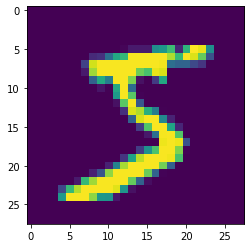

In [37]:
# print images

plt.imshow(x_train[0])

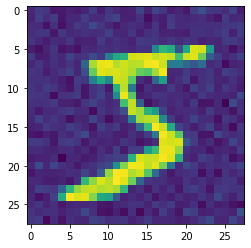

In [38]:
plt.imshow(x_train_noise[0])

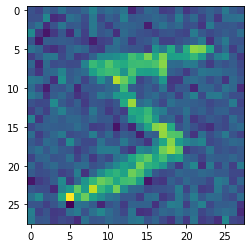

In [39]:
plt.imshow(x_train_noise_20[0])

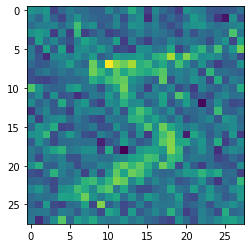

In [40]:
plt.imshow(x_train_noise_40[0])

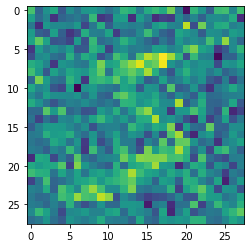

In [41]:
plt.imshow(x_train_noise_60[0])

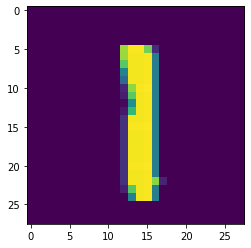

In [29]:
plt.imshow(x_test[2822])

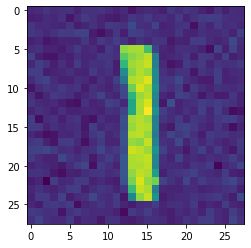

In [30]:
plt.imshow(x_test_noise[2822])

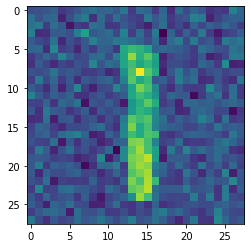

In [42]:
plt.imshow(x_test_noise_20[2822])

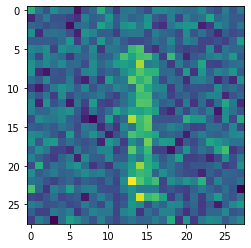

In [43]:
plt.imshow(x_test_noise_40[2822])

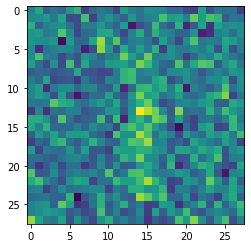

In [44]:
plt.imshow(x_test_noise_60[2822])

### MLNN Models with More Noise

In [46]:
x_train_mlnn_noise20 = mlnn_data_reshape(x_train_noise_20)
x_test_mlnn_noise20 = mlnn_data_reshape(x_test_noise_20)

x_train_mlnn_noise40 = mlnn_data_reshape(x_train_noise_40)
x_test_mlnn_noise40 = mlnn_data_reshape(x_test_noise_40)

x_train_mlnn_noise60 = mlnn_data_reshape(x_train_noise_60)
x_test_mlnn_noise60 = mlnn_data_reshape(x_test_noise_60)

mlnn_score20 = mlnn_function(x_train_mlnn_noise20, x_test_mlnn_noise20, y_train, y_test)

mlnn_score40 = mlnn_function(x_train_mlnn_noise40, x_test_mlnn_noise40, y_train, y_test)

mlnn_score60 = mlnn_function(x_train_mlnn_noise60, x_test_mlnn_noise60, y_train, y_test)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 15

### CNN Models with More Noise

In [47]:
x_train_cnn_noise20 = cnn_data_reshape(x_train_noise_20)
x_test_cnn_noise20 = cnn_data_reshape(x_test_noise_20)

x_train_cnn_noise40 = cnn_data_reshape(x_train_noise_40)
x_test_cnn_noise40 = cnn_data_reshape(x_test_noise_40)

x_train_cnn_noise60 = cnn_data_reshape(x_train_noise_60)
x_test_cnn_noise60 = cnn_data_reshape(x_test_noise_60)

cnn_score20 = cnn_function(x_train_cnn_noise20, x_test_cnn_noise20, y_train, y_test)

cnn_score40 = cnn_function(x_train_cnn_noise40, x_test_cnn_noise40, y_train, y_test)

cnn_score60 = cnn_function(x_train_cnn_noise60, x_test_cnn_noise60, y_train, y_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 107s 2ms/step - loss: 0.3090 - accuracy: 0.9049 - val_loss: 0.0776 - val_accuracy: 0.9753
Epoch 2/10
60000/60000 [==============================] - 119s 2ms/step - loss: 0.1072 - accuracy: 0.9684 - val_loss: 0.0552 - val_accuracy: 0.9819
Epoch 3/10
60000/60000 [==============================] - 154s 3ms/step - loss: 0.0820 - accuracy: 0.9752 - val_loss: 0.0448 - val_accuracy: 0.9852
Epoch 4/10
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0667 - accuracy: 0.9797 - val_loss: 0.0415 - val_accuracy: 0.9868
Epoch 5/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0573 - accuracy: 0.9832 - val_loss: 0.0375 - val_accuracy: 0.9873
Epoch 6/10
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0499 - accuracy: 0.9848 - val_loss: 0.0413 - val_accuracy: 0.9873
Epoch 7/10
60000/60000 [==============================] - 100s

### Graph Results

In [135]:
import pandas as pd

In [159]:
mlnn_scores_all = score_mlnn, score_mlnn_noise, mlnn_score20, mlnn_score40, mlnn_score60
cnn_scores_all = score_cnn, score_cnn_noise, cnn_score20, cnn_score40, cnn_score60

In [160]:
mlnn_scores_all = pd.DataFrame(mlnn_scores_all, columns= ["MLNN_Test_Loss", "MLNN_Test_Accuracy"], 
                               index= ["Original", "5% Noise", "20% Noise", "40% Noise", "60% Noise"])
cnn_scores_all = pd.DataFrame(cnn_scores_all, columns= ["CNN_Test_Loss", "CNN_Test_Accuracy"],
                             index= ["Original", "5% Noise", "20% Noise", "40% Noise", "60% Noise"])

In [162]:
all_scores = mlnn_scores_all.join(cnn_scores_all)
all_scores

,MLNN_Test_Loss,MLNN_Test_Accuracy,CNN_Test_Loss,CNN_Test_Accuracy
Original,0.085989,0.9824,0.026198,0.9919
5% Noise,0.123175,0.9797,0.029082,0.9898
20% Noise,0.229592,0.9654,0.039339,0.9886
40% Noise,0.465231,0.9388,0.068623,0.9797
60% Noise,0.746415,0.8977,0.144151,0.9611


In [157]:
all_scores.iloc[:,0]

Original     0.085989
5% Noise     0.123175
20% Noise    0.229592
40% Noise    0.465231
60% Noise    0.746415
Name: MLNN_Test_Loss, dtype: float64

### Plot of Loss Scores

Text(0, 0.5, 'Loss Score')

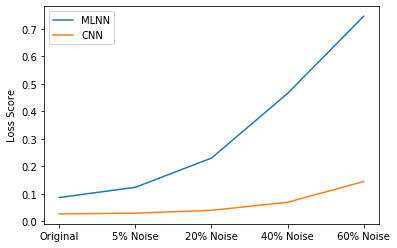

In [168]:
plt.plot(all_scores.index, all_scores.MLNN_Test_Loss, label = 'MLNN')
plt.plot(all_scores.index, all_scores.CNN_Test_Loss, label = 'CNN')
plt.legend()
plt.ylabel('Loss Score')

### Plot of Accuracy Scores

(0, 1)

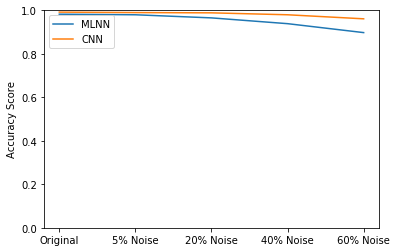

In [172]:
plt.plot(all_scores.index, all_scores.MLNN_Test_Accuracy, label = 'MLNN')
plt.plot(all_scores.index, all_scores.CNN_Test_Accuracy, label = 'CNN')
plt.legend()
plt.ylabel('Accuracy Score')
plt.ylim(0,1) #set limits to 100%

Text(0, 0.5, 'Accuracy Score')

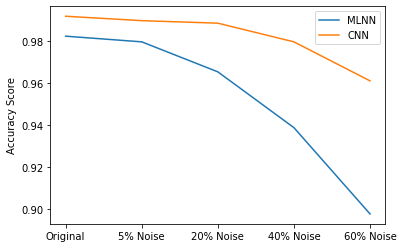

In [173]:
plt.plot(all_scores.index, all_scores.MLNN_Test_Accuracy, label = 'MLNN')
plt.plot(all_scores.index, all_scores.CNN_Test_Accuracy, label = 'CNN')
plt.legend()
plt.ylabel('Accuracy Score')